In [ ]:

import numpy as np
import keras 
from keras.models import Sequential 
from keras.layers import Activation,Dense,Dropout,Flatten,MaxPooling2D,Conv2D
import random
import warnings
import tensorflow as tf
import os 
import cv2
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img=cv2.imread("/content/drive/MyDrive/spectrograms/0/100852-0-0-0.png")

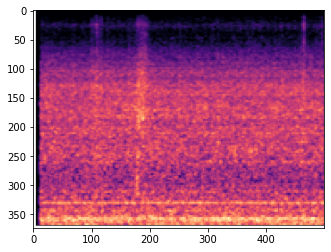

In [ ]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))


Preprocessing


In [ ]:

img_height = 256
img_width = 256
##Modelinizi geliştirirken bir doğrulama bölmesi kullanmak iyi bir uygulamadır. Görsellerin %80'ini eğitim için ve %20'sini doğrulama için kullanacaksınız.


train_ds = tf.keras.utils.image_dataset_from_directory(
  r"C:\Users\sertac\Desktop\data",
  seed=123,
  validation_split=0.2,
  subset="training",
  image_size=(img_height, img_width),
  color_mode="grayscale")


Found 8732 files belonging to 10 classes.
Using 6986 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
   r"C:\Users\sertac\Desktop\data",
   seed=123,
   validation_split=0.2,
   subset="validation",
   image_size=(img_height, img_width),
   color_mode="grayscale")

Found 8732 files belonging to 10 classes.
Using 1746 files for validation.


In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


Deep Learning Model



In [ ]:
model=Sequential()

#add conv and maxpool
model.add(Conv2D(64, (3,3), 1, padding='same', activation='relu', input_shape=(256,256,1)))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, padding="same", activation='relu'))
model.add(MaxPooling2D())

# add Flatten
model.add(Flatten())
##classification
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

In [ ]:
results=model.fit(
  train_ds,
  epochs=5,
  validation_data=val_ds)

Epoch 1/5
219/219 [==============================] - 37s 165ms/step - loss: 7.3639 - accuracy: 0.1788 - val_loss: 2.0129 - val_accuracy: 0.3494
Epoch 2/5
219/219 [==============================] - 36s 163ms/step - loss: 1.9828 - accuracy: 0.2917 - val_loss: 1.6179 - val_accuracy: 0.4662
Epoch 3/5
219/219 [==============================] - 36s 164ms/step - loss: 1.6722 - accuracy: 0.4029 - val_loss: 1.3621 - val_accuracy: 0.5418
Epoch 4/5
219/219 [==============================] - 36s 163ms/step - loss: 1.4169 - accuracy: 0.5047 - val_loss: 1.2786 - val_accuracy: 0.5607
Epoch 5/5
219/219 [==============================] - 36s 164ms/step - loss: 1.2267 - accuracy: 0.5760 - val_loss: 1.2429 - val_accuracy: 0.5785


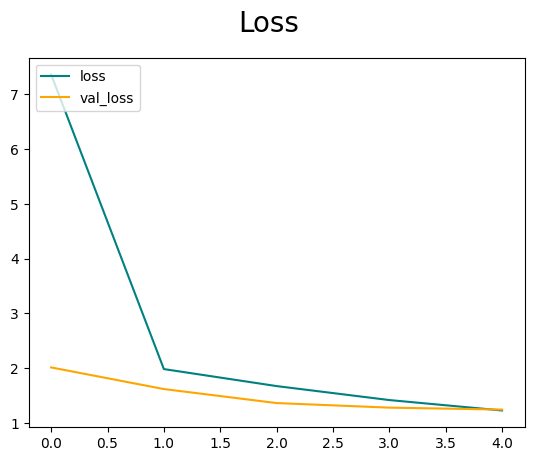

In [ ]:
fig = plt.figure()
plt.plot(results.history['loss'], color='teal', label='loss')
plt.plot(results.history['val_loss'], color='orange', label='val_loss')
                                
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc="upper left")
plt.show()
                  

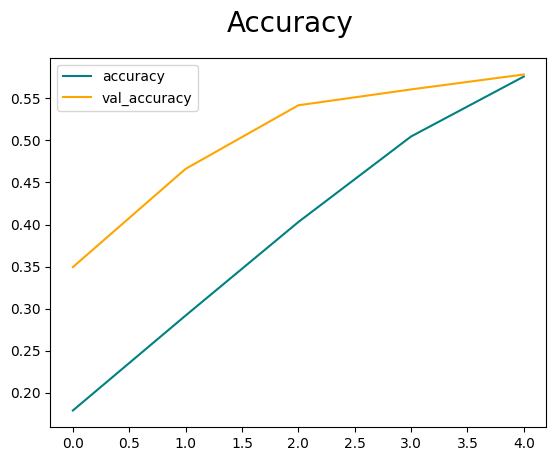

In [ ]:
fig = plt.figure()
plt.plot(results.history['accuracy'], color='teal', label='accuracy')
plt.plot(results.history['val_accuracy'], color='orange', label='val_accuracy')
                                
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc="upper left")
plt.show()